In [1]:
%matplotlib inline
import sys
sys.path.append('../')
from qradient.circuit_logic import MeynardClassifier
import numpy as np

In [2]:
qubits = 5
encoding_layers = 5
classifying_layers = 5

Instantiate the circuit.

In [3]:
circuit = MeynardClassifier(qubits, encoding_layers, classifying_layers)

Its main attribute is the ```state```, which itself contains the state vector and gates that can be applied to the state.

In [4]:
print(circuit.state)
print(circuit.state.vec)
print(circuit.state.gates)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


Let's create some artificial data and some artificial weights (or angles for that matter). The angles are rank-3 tensors. The first one corresponding to the layer, the second one to the qubit, and the third to the axis we want to rotate about.

In [5]:
data = np.random.rand(encoding_layers, qubits)
encoding_angles = np.random.rand(encoding_layers, qubits, 2)
classifying_angles = np.random.rand(classifying_layers, qubits, 3)

For instance ```encoding_angles[0, 1, 0]``` is the angle for the $y$-rotation on the second qubit in the first layer. The $x$-rotations in the encoding part are done with the data.

Similarly, ```classifying_angles[2, 0, 2]``` is the angle for the $z$-rotation on the first qubit in the third layer.

# Expectation values

To get the expectation value we first have to run the circuit with the chosen parameters and then call the ```expec_val``` method.

In [6]:
circuit.run(data, encoding_angles, classifying_angles)
circuit.expec_val()

-0.3066767588745724

# Gradients

If we are interested in the gradient we can simply call the ```grad_run``` method. No ```run``` is required before calling it.

In [7]:
e, enc_grad, class_grad = circuit.grad_run(data, encoding_angles, classifying_angles)
print('Expectation value: {}'.format(e))
print('Shape of the encoding_angles gradient: {}'.format(enc_grad.shape))
print('Shape of the classifying_angles gradient: {}'.format(class_grad.shape))

Expectation value: -0.30667675887457224
Shape of the encoding_angles gradient: (5, 5, 2)
Shape of the classifying_angles gradient: (5, 5, 3)


# Timing

In [8]:
import matplotlib.pyplot as plt
from time import time
def timing(f, *args):
    '''A convenient timing function.'''
    t1 = time()
    out = f(*args)
    t2 = time()
    return t2-t1, out

With the code below you can time the ```grad_run``` method on your machine.

In [10]:
qubit_range = range(2, 21)
times = []
for q in qubit_range:
    print(q, end='\r');
    data = np.random.rand(encoding_layers, q)
    encoding_angles = np.random.rand(encoding_layers, q, 2)
    classifying_angles = np.random.rand(classifying_layers, q, 3)
    circuit = MeynardClassifier(q, encoding_layers, classifying_layers)
    t, _ = timing(circuit.grad_run, data, encoding_angles, classifying_angles)
    times.append(t)

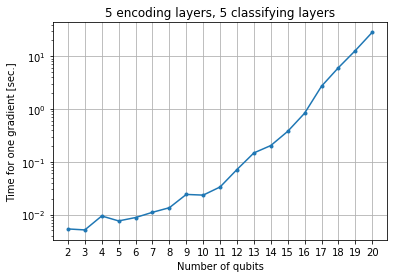

In [74]:
plt.plot(qubit_range, times, '.-')
plt.grid(True)
plt.semilogy()
plt.xlabel('Number of qubits')
plt.ylabel('Time for one gradient [sec.]')
plt.title('5 encoding layers, 5 classifying layers')
plt.xticks(qubit_range)
plt.show()